Anomaly detection in transactions means identifying unusual or unexpected patterns within transactions. These patterns, known as anomalies or outliers, deviate significantly from the expected norm and could indicate irregular or fraudulent behaviour. 
#### Process:
    Systematic process to address the challenge of anomaly detection
        1.Follecting and preparing transaction data, ensuring its accuracy and consistency
        2. Find patterns in the data to find anomalies and use specialized anomaly detection algorithms like 'isolation forest' to detect anomalies.
        

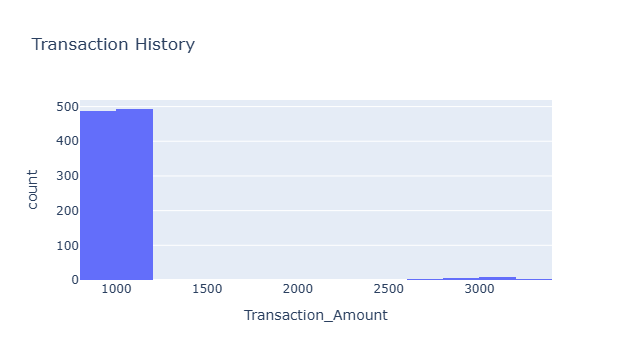

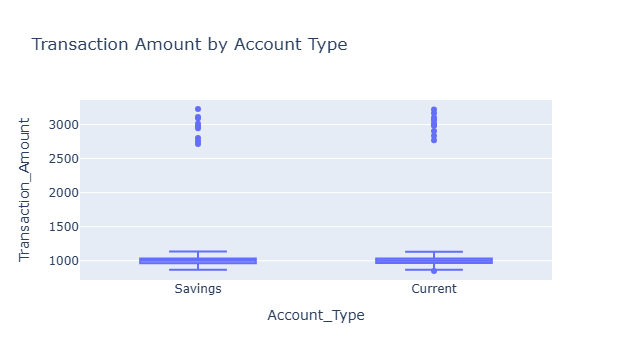

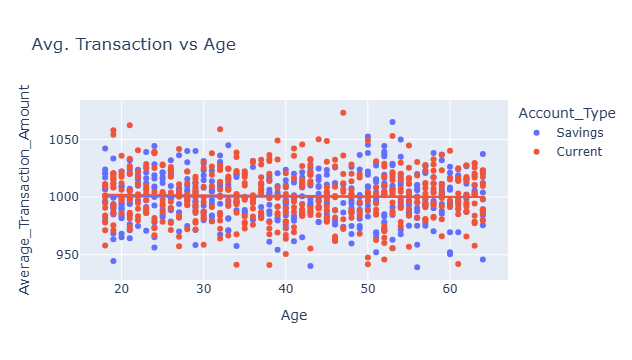

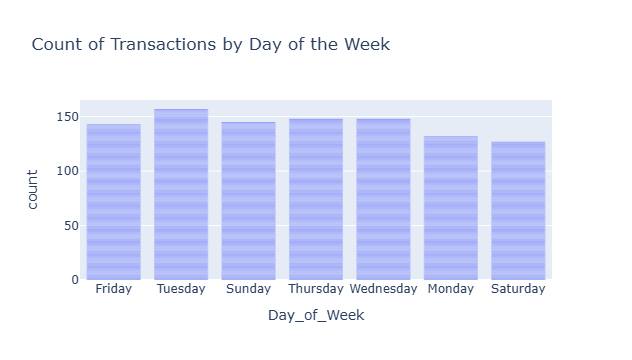

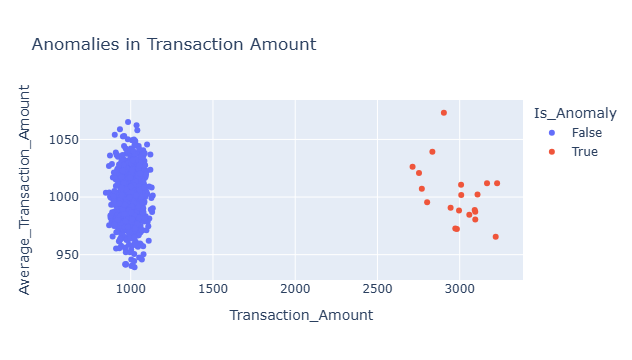


===== Classification Report =====
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       196
     Anomaly       1.00      1.00      1.00         4

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



Enter value for Transaction_Amount:  1200
Enter value for Average_Transaction_Amount:  1000
Enter value for Frequency_of_Transactions:  3



No anomaly detected.


In [84]:
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

# Load dataset
data = pd.read_csv('transaction_anomalies_dataset.csv')

# Data visualizations
px.histogram(data, x='Transaction_Amount', nbins=20, title='Transaction History').show()
px.box(data, x='Account_Type', y='Transaction_Amount', title='Transaction Amount by Account Type').show()
px.scatter(data, x='Age', y='Average_Transaction_Amount', color='Account_Type', 
           title='Avg. Transaction vs Age', trendline='ols').show()
px.bar(data, x='Day_of_Week', title='Count of Transactions by Day of the Week').show()

# Anomaly detection using Mean + 2*StdDev
mean_amount, std_amount = data['Transaction_Amount'].mean(), data['Transaction_Amount'].std()
data['Is_Anomaly'] = data['Transaction_Amount'] > (mean_amount + 2 * std_amount)

# Scatter plot highlighting anomalies
px.scatter(data, x='Transaction_Amount', y='Average_Transaction_Amount', 
           color='Is_Anomaly', title='Anomalies in Transaction Amount').show()

relevant_features = ['Transaction_Amount',
                     'Average_Transaction_Amount',
                     'Frequency_of_Transactions']

# Split data into features (X) and target (y)
X, y = data[relevant_features], data['Is_Anomaly']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Isolation Forest model
model = IsolationForest(contamination=0.02, random_state=42).fit(X_train)

# Predict anomalies
y_pred_binary = (model.predict(X_test) == -1).astype(int)

# Print classification report
print("\n===== Classification Report =====")
print(classification_report(y_test, y_pred_binary, target_names=['Normal', 'Anomaly']))

# User input for anomaly detection
user_df = pd.DataFrame([[float(input(f"Enter value for {col}: ")) for col in X.columns]], columns=X.columns)
print("\nAnomaly detected!" if model.predict(user_df)[0] == -1 else "\nNo anomaly detected.")
